## Hi, Below is part of my analysis using Python just to showcase the skillset.

### Importing Libraries that I'll using for Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Pulling in the data into Jupyter notebook

In [2]:
ws_data = pd.read_excel('C:/Users/aperiwal/Downloads/Wealthsimple - Transfers Data.xlsx')

#### Let do some sanity check around the data to get the feel of rows,columns and data within them

In [3]:
ws_data.head()

,transaction_id,business_unit_product,account_canonical_id,automation_status,error_details,current_status,amount,created_at,completed_at,updated_at,total_time_in_hours,total_time_minus_client_time,processing_time_in_hours,sla_due_at,number_of_sends,sending_method,financial_institution_division,parent_institution
0,TRFIN-88035,CA Retail: Invest,rrsp,"manual, no errors",NaN,completed,NaN,2019-01-01 0:00:30,2019-01-09 15:17:07,2019-01-09 15:17:07,207.0,207.0,NaN,2019-01-13 14:00:30,1.0,aton_sent,TD Direct Investing,TD Canada Trust
1,TRFIN-88036,CA Retail: Invest,rrsp,"manual, no errors",NaN,completed,NaN,2019-01-01 0:00:32,2019-01-16 22:39:33,2019-01-16 22:39:33,382.0,382.0,0.0166,2019-01-18 0:00:32,1.0,fax_sent,Sun Life Group Plans,Sun Life
2,TRFIN-88037,CA Retail: Invest,tfsa,"manual, errors",wrong_division,completed,NaN,2019-01-01 0:00:33,2019-01-09 22:30:31,2019-01-09 22:30:31,214.0,214.0,0.1166,2019-01-18 0:00:33,2.0,fax_sent,TD Mutual Funds,TD Canada Trust
3,TRFIN-88040,CA Retail: Invest,tfsa,"manual, no errors",NaN,completed,NaN,2019-01-01 0:00:34,2019-01-04 21:53:27,2019-01-04 21:53:27,93.0,93.0,0.0166,2019-01-18 0:00:34,1.0,fax_sent,People's Trust,People's Trust
4,TRFIN-88044,CA Retail: Invest,tfsa,cancelled before send,NaN,cancelled,NaN,2019-01-01 0:42:11,NaN,2019-01-01 0:43:21,NaN,NaN,NaN,NaN,NaN,NaN,RBC Branch,Royal Bank of Canada


In [4]:
ws_data.tail()

,transaction_id,business_unit_product,account_canonical_id,automation_status,error_details,current_status,amount,created_at,completed_at,updated_at,total_time_in_hours,total_time_minus_client_time,processing_time_in_hours,sla_due_at,number_of_sends,sending_method,financial_institution_division,parent_institution
15721,TRFIN-105168,CA Retail: Invest,rrsp,"manual, errors","institution_did_not_receive, wrong_delivery_me...",completed,NaN,2019-03-31 23:00:49,2019-06-03 14:24:01,2019-06-03 14:24:01,1527.0,1527.0,0.1333,NaN,3.0,"aton_sent, fax_sent",Scotia Securities,Scotiabank
15722,TRFIN-105172,CA Retail: Invest,tfsa,cancelled before send,NaN,cancelled,NaN,2019-03-31 23:07:04,NaN,2019-03-31 23:36:56,NaN,NaN,0.0333,NaN,NaN,NaN,TD Bank Branch,TD Canada Trust
15723,TRFIN-105175,CA Retail: Invest,tfsa,cancelled before send,NaN,cancelled,NaN,2019-03-31 23:26:27,NaN,2019-03-31 23:26:43,NaN,NaN,NaN,NaN,NaN,NaN,TD Bank Branch,TD Canada Trust
15724,TRFIN-105179,CA Retail: Invest,tfsa,cancelled before send,NaN,cancelled,NaN,2019-03-31 23:48:06,NaN,2019-03-31 23:55:37,NaN,NaN,NaN,NaN,NaN,NaN,Tangerine,Tangerine Bank
15725,TRFIN-105180,CA Retail: Invest,tfsa,cancelled before send,NaN,cancelled,NaN,2019-03-31 23:51:06,NaN,2019-03-31 23:51:20,NaN,NaN,NaN,NaN,NaN,NaN,Sun Life Group Plans,Sun Life


In [5]:
# lets see the basic data type of this data 
ws_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  15726 non-null  object 
 1   business_unit_product           15726 non-null  object 
 2   account_canonical_id            15726 non-null  object 
 3   automation_status               15726 non-null  object 
 4   error_details                   3452 non-null   object 
 5   current_status                  15726 non-null  object 
 6   amount                          0 non-null      float64
 7   created_at                      15726 non-null  object 
 8   completed_at                    10976 non-null  object 
 9   updated_at                      15726 non-null  object 
 10  total_time_in_hours             10976 non-null  float64
 11  total_time_minus_client_time    10976 non-null  float64
 12  processing_time_in_hours        

In [6]:
#Few oberservations about the data,here there are 18 columns & 15726 rows -
#1)Certain columns are dates and should be changed to "date" datatype
#2)All values in Amount column are null. So we either drop it from our dataframe or just avoid it. I am going avoid it.
ws_data['created_at'] = pd.to_datetime(ws_data['created_at'])
ws_data['completed_at'] = pd.to_datetime(ws_data['completed_at'])
ws_data['updated_at'] = pd.to_datetime(ws_data['updated_at'])
ws_data['sla_due_at'] = pd.to_datetime(ws_data['sla_due_at'])

In [7]:
ws_data.info()
#This looks much better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   transaction_id                  15726 non-null  object        
 1   business_unit_product           15726 non-null  object        
 2   account_canonical_id            15726 non-null  object        
 3   automation_status               15726 non-null  object        
 4   error_details                   3452 non-null   object        
 5   current_status                  15726 non-null  object        
 6   amount                          0 non-null      float64       
 7   created_at                      15726 non-null  datetime64[ns]
 8   completed_at                    10976 non-null  datetime64[ns]
 9   updated_at                      15726 non-null  datetime64[ns]
 10  total_time_in_hours             10976 non-null  float64       
 11  to

# Now lets start some analysis

### What is WS majority business_unit_product and what's its proportion?

In [8]:
#Majority of the business comes from CA Retail: Invest - Absolute numbers below : 
ws_data['business_unit_product'].value_counts()

CA Retail: Invest    13782
CA B2B: W4A           1944
Name: business_unit_product, dtype: int64

In [9]:
#Prportionate numbers below : 
print ('Proportion of business for WealthSimple')
round(ws_data['business_unit_product'].value_counts()/ws_data['business_unit_product'].count() * 100,2)

Proportion of business for WealthSimple


CA Retail: Invest    87.64
CA B2B: W4A          12.36
Name: business_unit_product, dtype: float64

#### Conclusion : Retail accounts for about 88% of WealthSimple transfers data
# --------------------------------------------------------------------------------------------------------------

### What type of account are the transactions happening for? i.e RRSP, TFSA etc?

In [10]:
#Absolute count of numbers
ws_data['account_canonical_id'].value_counts()

rrsp              7013
tfsa              4980
non-registered    1257
lira              1134
resp               710
spousal rrsp       354
rrif               102
lif                 64
joint               63
corporate           49
Name: account_canonical_id, dtype: int64

In [11]:
#Propotionate numbers
print ('Proportion of account types for WealthSimple')
round(ws_data['account_canonical_id'].value_counts()/ws_data['account_canonical_id'].count() * 100,2)

Proportion of account types for WealthSimple


rrsp              44.59
tfsa              31.67
non-registered     7.99
lira               7.21
resp               4.51
spousal rrsp       2.25
rrif               0.65
lif                0.41
joint              0.40
corporate          0.31
Name: account_canonical_id, dtype: float64

#### Conclusion : 75% of the users are transfering in their TFSA and RRSP accout. 
# --------------------------------------------------------------------------------------------------------------

### Now lets look at the financial instutions WS is dealing with

In [12]:
#The unique number and list of parent instutions WS is dealing with
unique_comp = ws_data['parent_institution'].unique()
print ("The total number of Parent Institution WS deals with is",len(unique_comp),"and below are the list of institutions:\n\n",unique_comp)

The total number of Parent Institution WS deals with is 91 and below are the list of institutions:

 ['TD Canada Trust' 'Sun Life' "People's Trust" 'Royal Bank of Canada'
 'Alberta Treasury Branches' 'Credential' 'Primerica Canada'
 'Industrial Alliance (IA)' 'Tangerine Bank' 'HSBC' nan 'Scotiabank'
 'Canadian Western Bank' 'CIBC' 'CI Investments' 'Wealthsimple'
 'Bank of Montreal' 'Manulife' 'Simplii Financial' 'Canadian Tire Bank'
 'Meridian Credit Union' 'National Bank of Canada' 'Coast Capital Savings'
 'Great West Life' 'Hubert Financial' 'Qtrade' 'Questrade' 'AGF'
 'Desjardins' 'Computershare' 'Olympia Trust Company' 'Invesco Canada'
 'Investors Group' 'Servus Credit Union' 'FundEX Investments'
 'Quadrus Investment Services' 'Canada Life' 'Renaissance Investments'
 'Worldsource Financial Management' 'Fidelity'
 'Concentra Financial Services Association' 'Edward Jones' 'Dynamic Funds'
 'Libro Credit Union' 'Mackenzie' 'MD Management' 'BMG Group'
 'Steinbach Credit Union' 'BBS Secu

In [13]:
#The top 5 institutions Wealthsimple Deals with
top_parties = ws_data['parent_institution'].value_counts()
top_parties.head()

TD Canada Trust         2298
Royal Bank of Canada    1778
Tangerine Bank          1142
CIBC                    1022
Manulife                 986
Name: parent_institution, dtype: int64

In [14]:
pct_top_parties = top_parties.head().sum()/top_parties.sum()
print ('Business from top 5 partners accounts to about ', round (pct_top_parties * 100,2))

Business from top 5 partners accounts to about  48.79


#### Conclusion : There are 91 unique Parent instutions WS deals with. Majority of those are the as below

TD Canada Trust        
Royal Bank of Canada    
Tangerine Bank          
CIBC                    
Manulife   


#### These top 5 banks accounts for about 50% of the transfers 
# --------------------------------------------------------------------------------------------------------------

### Now lets look at the other important metrics such the total hours, processing times and number of sends

In [15]:
ws_data.describe()

,amount,total_time_in_hours,total_time_minus_client_time,processing_time_in_hours,number_of_sends
count,0.0,10976.000000,10976.000000,11172.000000,12746.000000
mean,NaN,393.933673,354.196599,0.067672,1.242743
std,NaN,391.018009,321.897995,0.083459,0.655900
min,NaN,4.000000,-502.566600,0.000000,1.000000
25%,NaN,181.000000,172.000000,0.016600,1.000000
50%,NaN,269.000000,261.666700,0.033300,1.000000
75%,NaN,454.000000,412.887500,0.083300,1.000000
max,NaN,4145.000000,3382.050100,0.950000,10.000000


### The above is a very simple yet detailed table.
#### Few key points are as below :

In [16]:
print ('The average total_time_in_hours is {} hours. The least amount of time taken is {} hours and the max amount of time taken is {} hours.'.format(round(ws_data['total_time_in_hours'].mean(),2),ws_data['total_time_in_hours'].min(),ws_data['total_time_in_hours'].max()))

The average total_time_in_hours is 393.93 hours. The least amount of time taken is 4.0 hours and the max amount of time taken is 4145.0 hours.


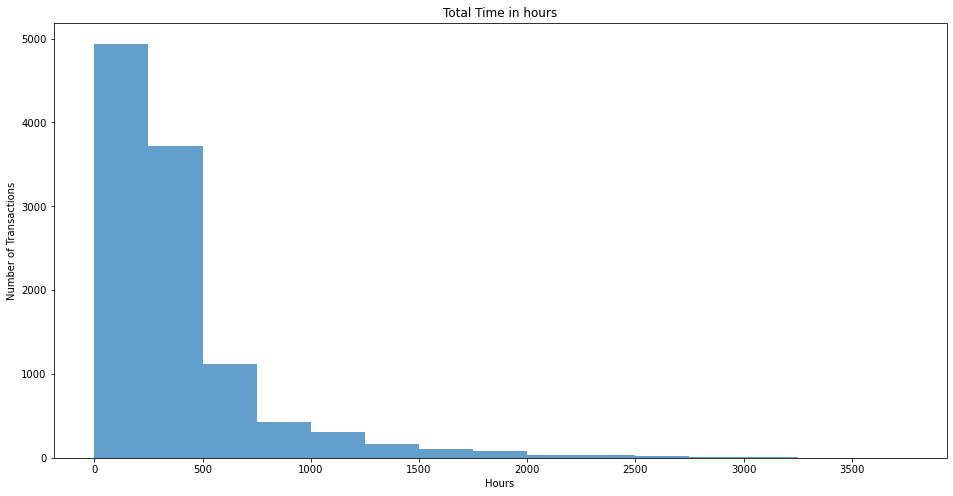

In [17]:
plt.figure(figsize=(16,8))
plt.title('Total Time in hours')
plt.xlabel('Hours')
plt.ylabel('Number of Transactions')
plt.hist(ws_data['total_time_in_hours'],bins=np.arange(0,4000,250),alpha=0.7);

### This image helps us understand the majority of transfers happen within the first 400 hours.
### Anything above that is a delay and above 700 hours are extremely delayed 

In [18]:
print ('Number of transactions exceeding average time',(ws_data['total_time_in_hours'] > 400).sum())

print ('Number of transactions exceeding 500 hours',(ws_data['total_time_in_hours'] > 500).sum())

print ("\x1b[31m\"Number of transactions exceeding 700 hours is",(ws_data['total_time_in_hours'] > 700).sum(),",Needs immidiate attention\"\x1b[0m")

Number of transactions exceeding average time 3259
Number of transactions exceeding 500 hours 2308
"Number of transactions exceeding 700 hours is 1325 ,Needs immidiate attention"


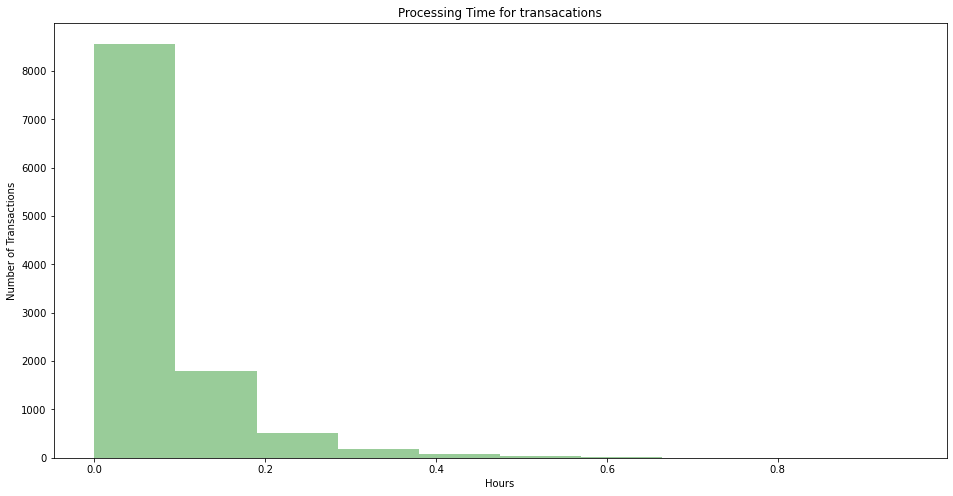

In [19]:
plt.figure(figsize=(16,8))
plt.title('Processing Time for transacations')
plt.xlabel('Hours')
plt.ylabel('Number of Transactions')
plt.hist(ws_data['processing_time_in_hours'],color='g',alpha=0.4);

### This image helps us understand the majority of processing happen within the first 12 mins.
### Anything above that is a delay and above 1 hour is abnormal

In [20]:
print ('Number of transactions exceeding average time of 0.2 hours',(ws_data['processing_time_in_hours'] > 0.2).sum())

print ('Number of transactions exceeding 0.4 hours',(ws_data['processing_time_in_hours'] > .4).sum())

print ("Number of transactions exceeding 1 hour is",(ws_data['processing_time_in_hours'] > 1).sum(),",Needs immidiate attention")

Number of transactions exceeding average time of 0.2 hours 708
Number of transactions exceeding 0.4 hours 110
Number of transactions exceeding 1 hour is 0 ,Needs immidiate attention


In [21]:
ws_data['sla_breached'] = (ws_data['completed_at'] > ws_data['sla_due_at'])

In [22]:
ws_data[ws_data['sla_breached']==True]

,transaction_id,business_unit_product,account_canonical_id,automation_status,error_details,current_status,amount,created_at,completed_at,updated_at,total_time_in_hours,total_time_minus_client_time,processing_time_in_hours,sla_due_at,number_of_sends,sending_method,financial_institution_division,parent_institution,sla_breached
6,TRFIN-87811,CA B2B: W4A,lira,"manual, no errors",NaN,completed,NaN,2019-01-01 02:00:23,2019-01-16 16:18:20,2019-01-16 16:18:20,374.0,374.0000,NaN,2019-01-13 16:00:23,1.0,aton_sent,Credential Securities,Credential,True
7,TRFIN-87812,CA B2B: W4A,lira,"manual, errors",received_over_the_counter_securities,completed,NaN,2019-01-01 02:00:24,2019-02-11 20:41:21,2019-02-11 20:41:21,1002.0,378.5667,0.0500,2019-02-08 15:00:24,1.0,aton_sent,Credential Securities,Credential,True
8,TRFIN-87814,CA B2B: W4A,rrsp,"manual, errors","no_agreement_with_fund_company, other",completed,NaN,2019-01-01 02:00:26,2019-02-05 17:48:16,2019-02-12 20:08:58,855.0,466.5334,0.1000,2019-01-29 20:00:26,2.0,aton_sent,Credential Securities,Credential,True
9,TRFIN-87825,CA B2B: W4A,rrsp,"manual, errors",received_over_the_counter_securities,completed,NaN,2019-01-01 02:00:27,2019-01-30 16:07:24,2019-01-30 16:07:24,710.0,686.1167,0.0500,2019-01-14 15:00:27,2.0,aton_sent,Credential Securities,Credential,True
15,TRFIN-59499,CA Retail: Invest,rrsp,"manual, no errors",NaN,completed,NaN,2019-01-01 08:00:23,2019-01-29 22:01:46,2019-01-31 17:54:29,686.0,686.0000,0.0166,2019-01-18 08:00:23,1.0,fax_sent,HSBC,HSBC,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15693,TRFIN-105140,CA Retail: Invest,rrsp,"manual, errors",wrong_delivery_method,completed,NaN,2019-03-31 21:00:47,2019-05-21 21:31:28,2019-05-21 21:31:28,1224.0,1224.0000,0.1333,2019-04-17 21:00:47,2.0,fax_sent,Great West Life,Great West Life,True
15694,TRFIN-105141,CA Retail: Invest,spousal rrsp,"manual, errors",could_not_reach_institution,completed,NaN,2019-03-31 21:00:48,2019-05-01 21:14:27,2019-05-01 21:14:27,744.0,742.4834,0.0666,2019-04-17 22:00:48,1.0,fax_sent,CIBC Branch / Securities,CIBC,True
15695,TRFIN-105143,CA Retail: Invest,tfsa,"manual, no errors",NaN,completed,NaN,2019-03-31 21:00:50,2019-05-09 20:39:05,2019-05-09 20:39:05,935.0,935.0000,0.0166,2019-04-17 21:00:50,1.0,fax_sent,BMO Mutual Funds / Term Investments,Bank of Montreal,True
15708,TRFIN-105158,CA Retail: Invest,tfsa,"manual, no errors",NaN,completed,NaN,2019-03-31 22:00:44,2019-04-16 14:30:22,2019-04-16 14:30:22,376.0,376.0000,NaN,2019-04-13 12:00:44,1.0,aton_sent,Questrade,Questrade,True


### 2800+ time WS breached SLA. Requires further investigation.